In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.ticker as mtick
import calendar
import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import matplotlib.dates as matdates
from datetime import datetime, timedelta
from google.colab import drive
import os
from bokeh.io import output_notebook, show
output_notebook()
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/My Drive/UMN/Research/Ongoing Research/covid-19 workshop/visualization/"
df = pd.read_csv(path+"traffic_data.csv")
df = df.dropna()
df = df[1:]
df = df.set_index(np.arange(0, len(df)))
df_sum = df.groupby(df.index // 7).sum()
df.head()

,date,weekday,District,actual_volume,predicted_volume,volume_difference_percent,roll_avg
0,1/4/2020 23:00,Saturday,MnDOT Metro Freeways,92970179.0,96025924.0,-3.18,2.010000
1,1/5/2020 23:00,Sunday,MnDOT Metro Freeways,142930623.0,132490691.0,7.88,3.105714
2,1/6/2020 23:00,Monday,MnDOT Metro Freeways,147758830.0,140348766.0,5.28,4.007143
3,1/7/2020 23:00,Tuesday,MnDOT Metro Freeways,147778013.0,141425729.0,4.49,3.845714
4,1/8/2020 23:00,Wednesday,MnDOT Metro Freeways,147301275.0,139979016.0,5.23,4.681429


In [3]:
start, end = '2020-01-04 00:00:00', '2021-04-04 00:00:00'
rng = pd.date_range(start, end, freq='10080min')
ts = pd.DataFrame(np.arange(len(rng)) * 7, index=rng)
ts = ts.reset_index()
df_sum["date"] = ts[:-1]["index"]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


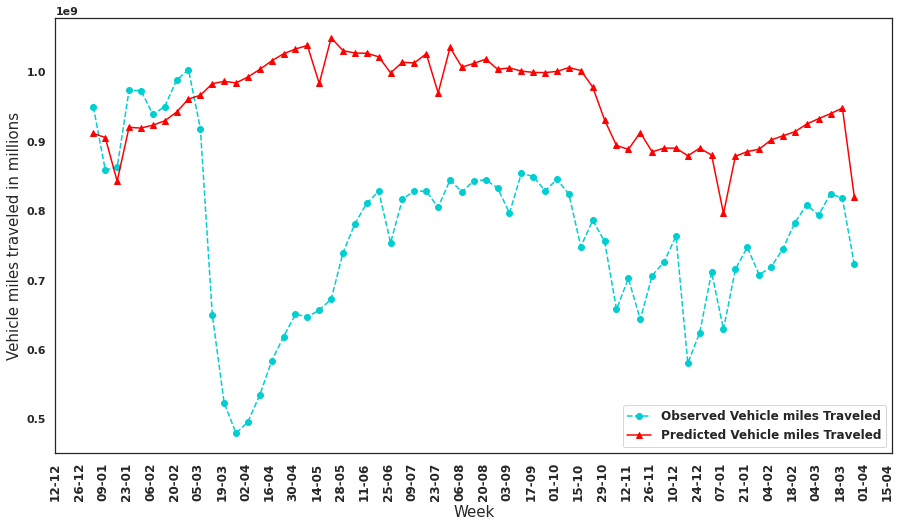

In [4]:
sns.set()
sns.set_style("white")

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)

fig, ax1 = plt.subplots(figsize=(15, 8))
ax1.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax1.plot(df_sum['date'], df_sum['actual_volume'], marker = "o", color = "#00CED1", alpha = 1.0, linestyle="dashed",  label = 'Observed Vehicle miles Traveled')
ax1.plot(df_sum['date'], df_sum['predicted_volume'], marker = "^", color = "#FF0000", alpha = 1.0,  label = 'Predicted Vehicle miles Traveled')

ax1.legend(loc = "lower right", fontsize = 12)
plt.ylabel("Vehicle miles traveled in millions", fontsize=15)
plt.xlabel("Week", fontsize=15)
date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 14))
# plt.savefig('relatives.png', dpi=300, bbox_inches='tight')
plt.show()

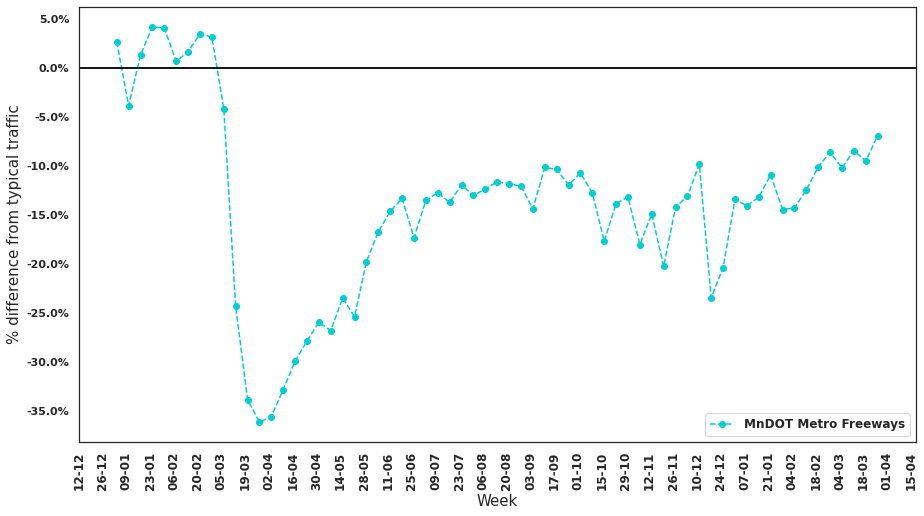

In [5]:
sns.set()
sns.set_style("white")

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)

fig, ax1 = plt.subplots(figsize=(15, 8))
ax1.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax1.plot(df_sum['date'], df_sum['volume_difference_percent']/10, marker = "o", color = "#00CED1", alpha = 1.0, linestyle="dashed",  label = 'MnDOT Metro Freeways')
ax1.legend(loc = "lower right", fontsize = 12)
plt.ylabel("% difference from typical traffic", fontsize=15)
plt.xlabel("Week", fontsize=15)
date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 14))
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.axhline(y= 0.000,color = "black", alpha= 0.9, linewidth=2)
# plt.savefig('relatives.png', dpi=300, bbox_inches='tight')
plt.show()